<a href="https://colab.research.google.com/github/saarthakvyas/Breast_Cancer_Detection/blob/main/Breast_Cancer_Project_P(V1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore') #Ignore any warnings that appear

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np  #linear Algebra
import pandas as pd #data frame & data representation
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats
import statsmodels.formula.api as smf

#Packages related to data visualizaiton & Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Moudles related to feature selection
from sklearn.feature_selection import RFE, SelectKBest, chi2,f_classif, f_regression

#Modules related to saving python objects permanantly
import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import confusion_matrix

### Importing Packages for building classification models using Machine Learning

#### Load the data

In [9]:
df = pd.read_csv("data.csv")

#Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)


In [10]:
#Renaming the columsns by replacing special characters with underscore
df.columns = [ i.replace(' ', '_') for i in df.columns]

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:_32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:_32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**Removing The unnecessary Columns**

In [13]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed:_32',axis=1,inplace=True)

**Dimension of DataFrame**

In [14]:
df.shape

(569, 31)

**Checking Target Variable**

In [15]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [16]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Converting Target Variable in form of 1 and 0 by mapping**

In [17]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [18]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## Exploratory Data Analysis

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [20]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

In [21]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [22]:
df.iloc[:,1:31].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


**Visualizing Heat Map For correlation**

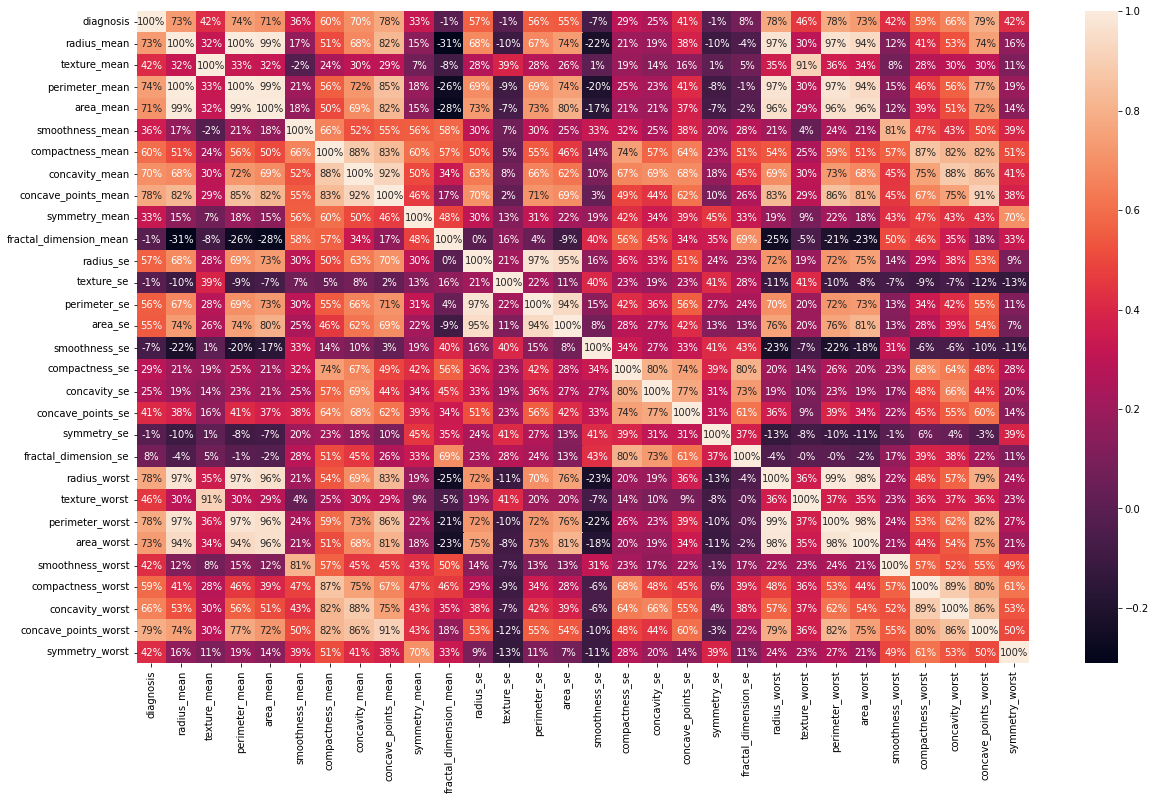

In [23]:
# visualize correlation matrix in Seaborn using a heatmap
figure = plt.figure(figsize=(20,12))
sns.heatmap(df.iloc[:,0:30].corr(), annot = True, fmt = '.0%')

#### As we can see from the profiling report that:-
- area_worst is highly correlated with area_mean (ρ = 0.9592133256)
- concave_points_worst is highly correlated with concave_points_mean (ρ = 0.9101553143)
- concavity_mean is highly correlated with concave_points_mean (ρ = 0.9213910264)
- perimeter_mean is highly correlated with area_worst (ρ = 0.941549808)
- perimeter_se is highly correlated with area_se (ρ = 0.937655407)
- perimeter_worst is highly correlated with perimeter_mean (ρ = 0.970386887)
- radius_mean is highly correlated with perimeter_worst (ρ = 0.965136514)
- radius_se is highly correlated with perimeter_se (ρ = 0.972793677)
- radius_worst is highly correlated with radius_mean (ρ = 0.9695389726)
- texture_worst is highly correlated with texture_mean (ρ = 0.9120445888)

**So we can reject the highly correlated variables in the later stage**

#### Distribution of Target Variable

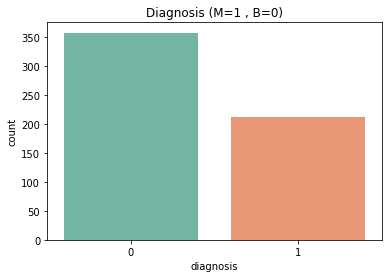

In [24]:
plt.title('Diagnosis (M=1 , B=0)')
sns.countplot(df["diagnosis"],palette="Set2")
plt.show()

In [25]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

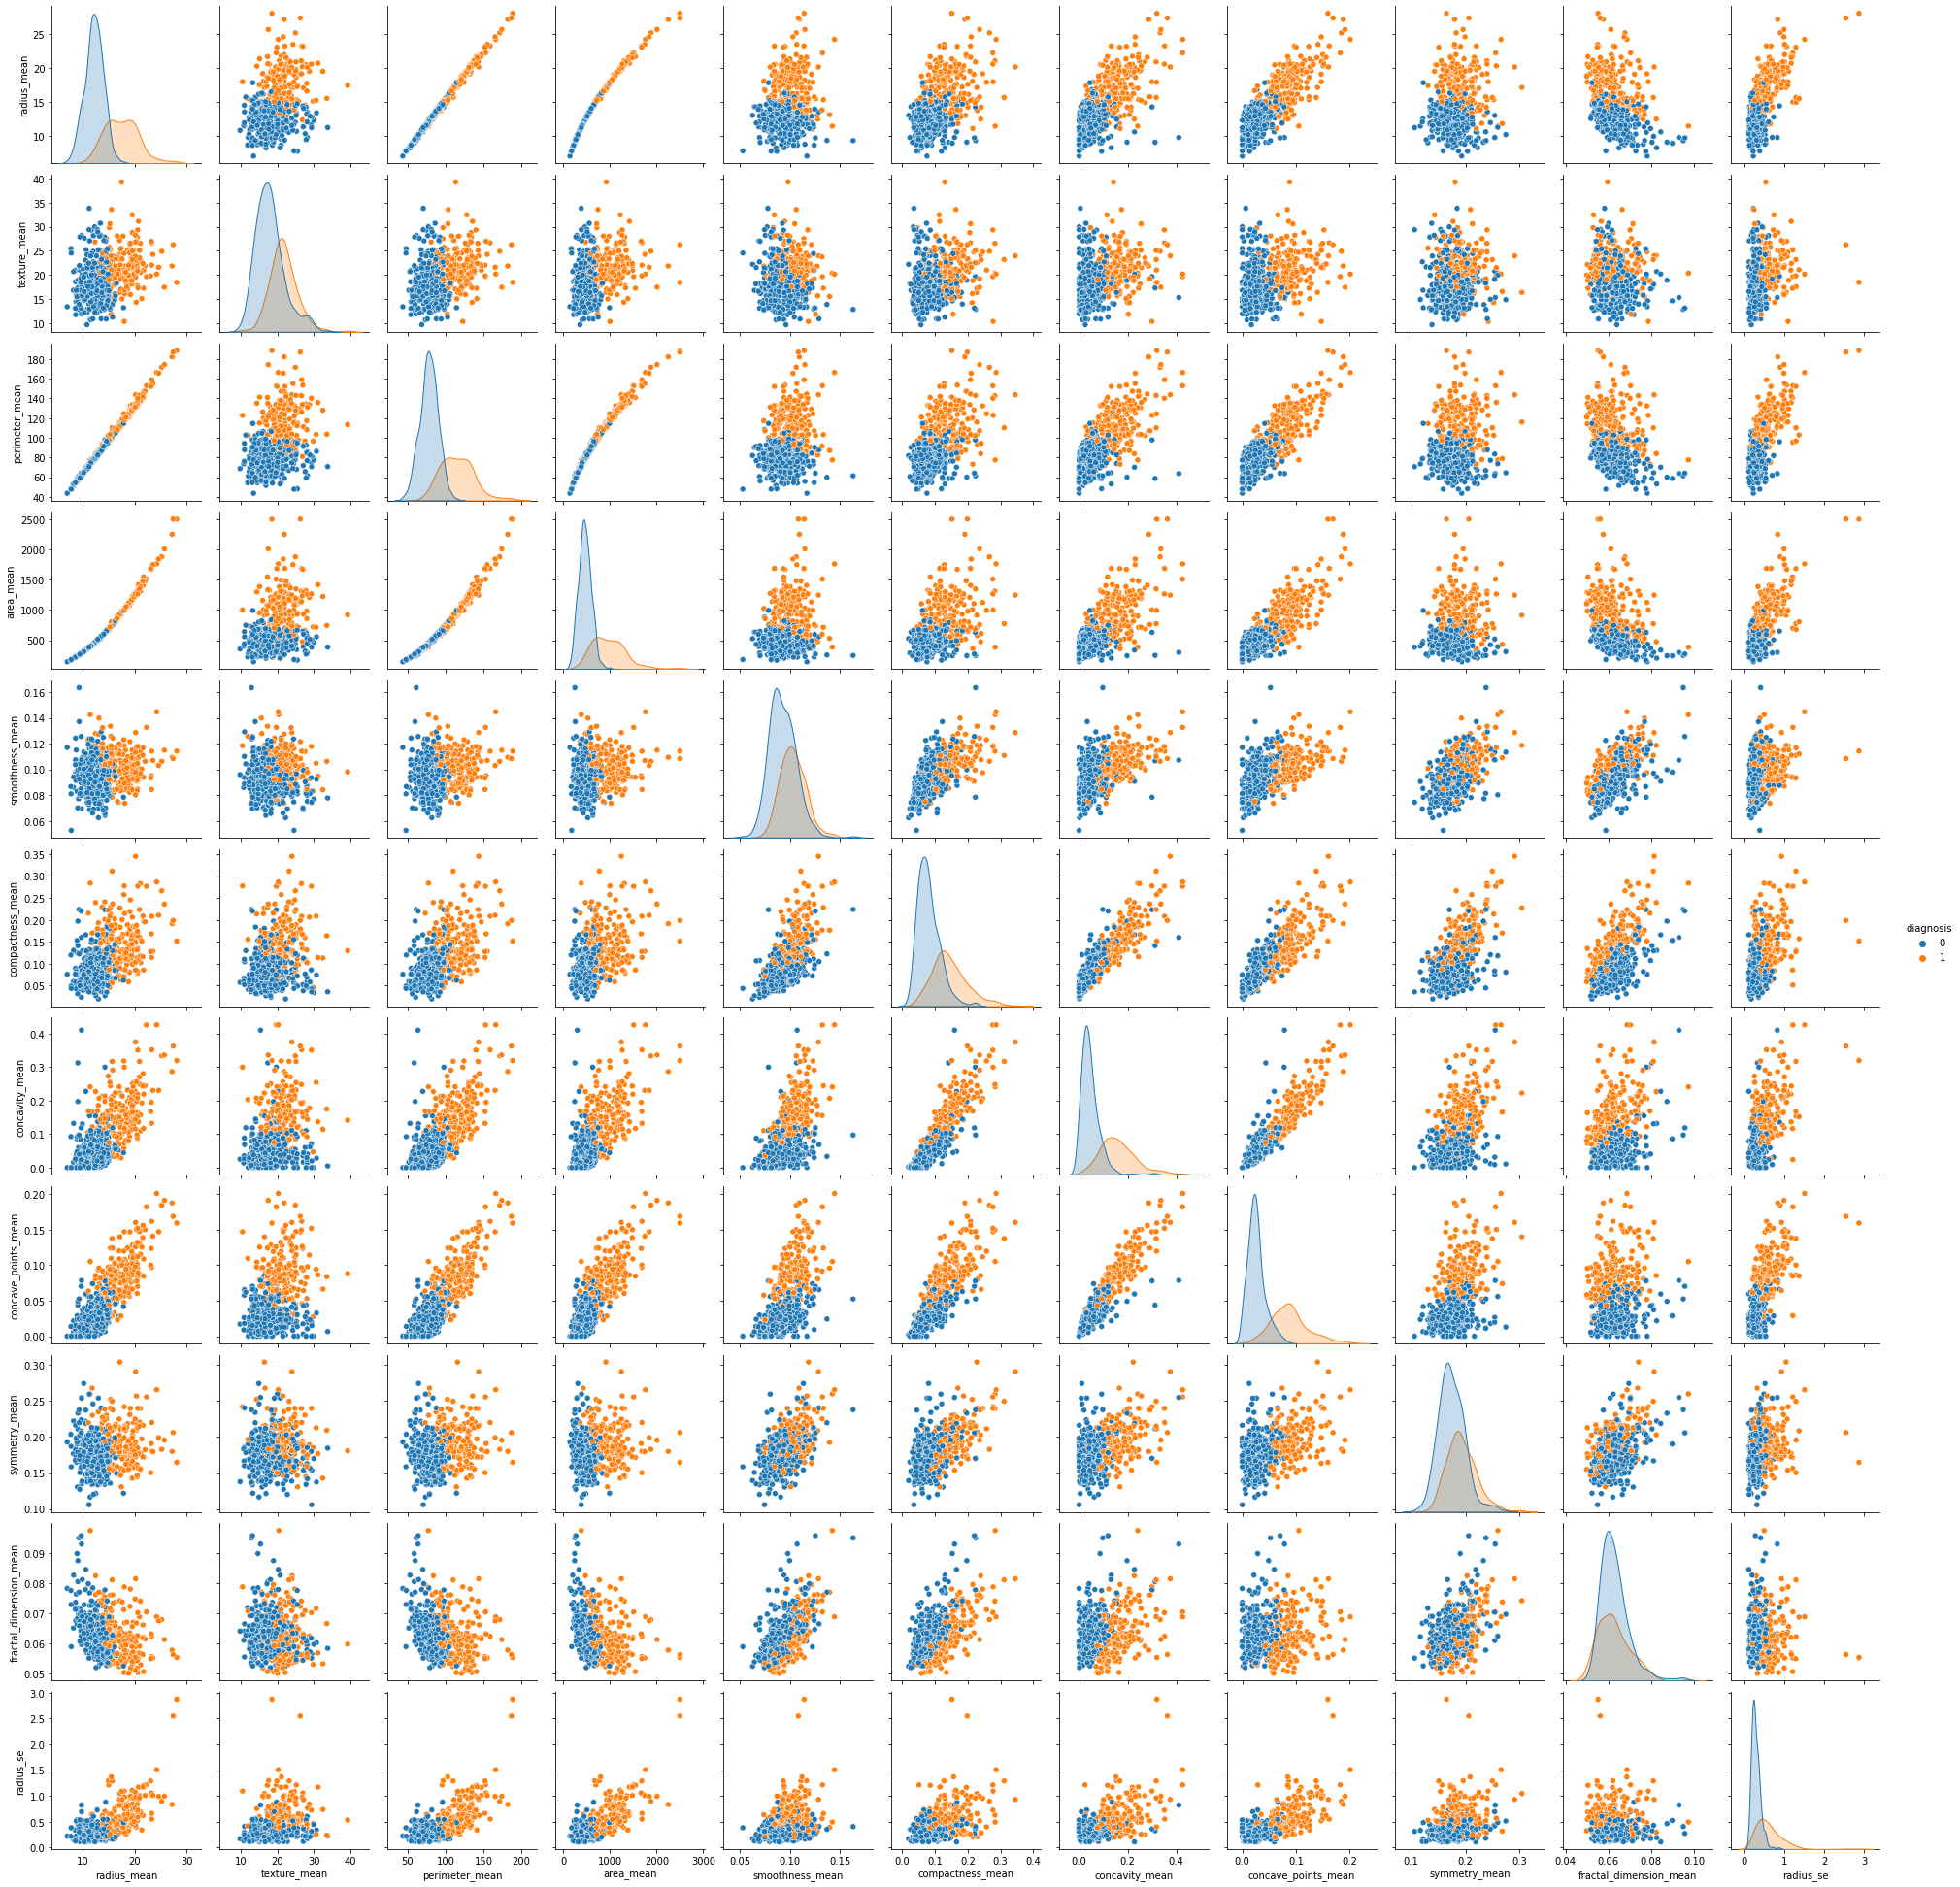

In [26]:
sns.pairplot(df.iloc[:,0:12], hue='diagnosis')

Almost perfectly linear patterns between the radius, perimeter and area 
attributes are hinting at the presence of multicollinearity between these 
variables. (they are highly linearly related) Another set of vanables that 
possibly imply multicollinearity are the concavity, concave _points and

Multicollinearity is a problem as it undermines the significance of independent varibales and we fix it by removing the highly correlated predictors from the model Use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components.

In [27]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Feature Reduction 

**Dropping the highly correated variables**

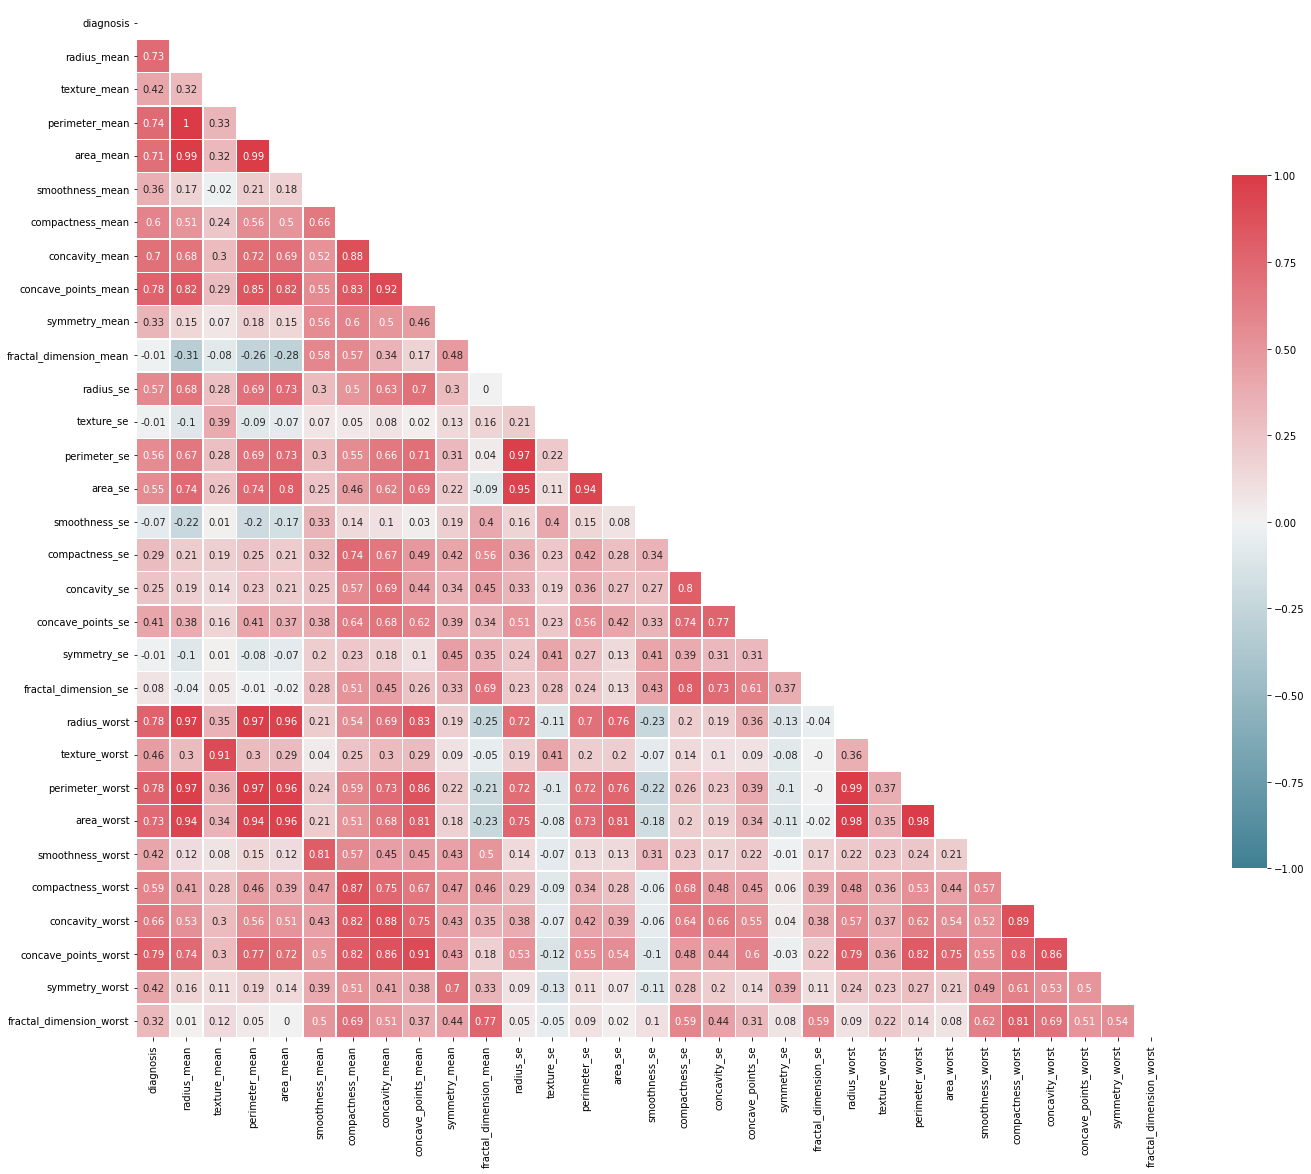

In [28]:
# Generate and visualize the Diagonal correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [29]:
df.shape

(569, 31)

# 1) RFE(Recursive Feature Elimination)

In [30]:
X = df[df.columns.difference(['diagnosis'])]
classifier = RandomForestClassifier()
rfe = RFE(classifier)
rfe = rfe.fit(X, df[['diagnosis']] )

In [31]:
imp_vars_RFE = list(X.columns[rfe.support_])

**Important Variables by RFE method**

In [32]:
imp_vars_RFE

['area_mean',
 'area_se',
 'area_worst',
 'concave_points_mean',
 'concave_points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_worst',
 'radius_mean',
 'radius_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_mean',
 'texture_worst']

### 3) Select K Best

In [33]:
X = df[df.columns.difference(['diagnosis'])]
SKB = SelectKBest(f_classif, k=10).fit(X, df[['diagnosis']] )

In [34]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

**Important Variables by Select K best**

In [35]:
imp_vars_SKB

['area_mean',
 'area_worst',
 'concave_points_mean',
 'concave_points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_worst',
 'radius_mean',
 'radius_worst']

In [36]:
Final_list = list(set(imp_vars_SKB + imp_vars_RFE))

### Making Final List Of Important Variables

In [37]:
Final_list

['concave_points_worst',
 'radius_worst',
 'concavity_mean',
 'concave_points_mean',
 'area_se',
 'symmetry_worst',
 'texture_worst',
 'perimeter_mean',
 'texture_mean',
 'perimeter_worst',
 'smoothness_worst',
 'radius_mean',
 'area_worst',
 'concavity_worst',
 'area_mean']

In [38]:
df.drop(['area_worst','concavity_mean','perimeter_se','perimeter_worst',
        'radius_worst','texture_worst','concave_points_worst','radius_se','perimeter_mean','radius_mean'],axis=1,inplace=True)

In [39]:
df.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

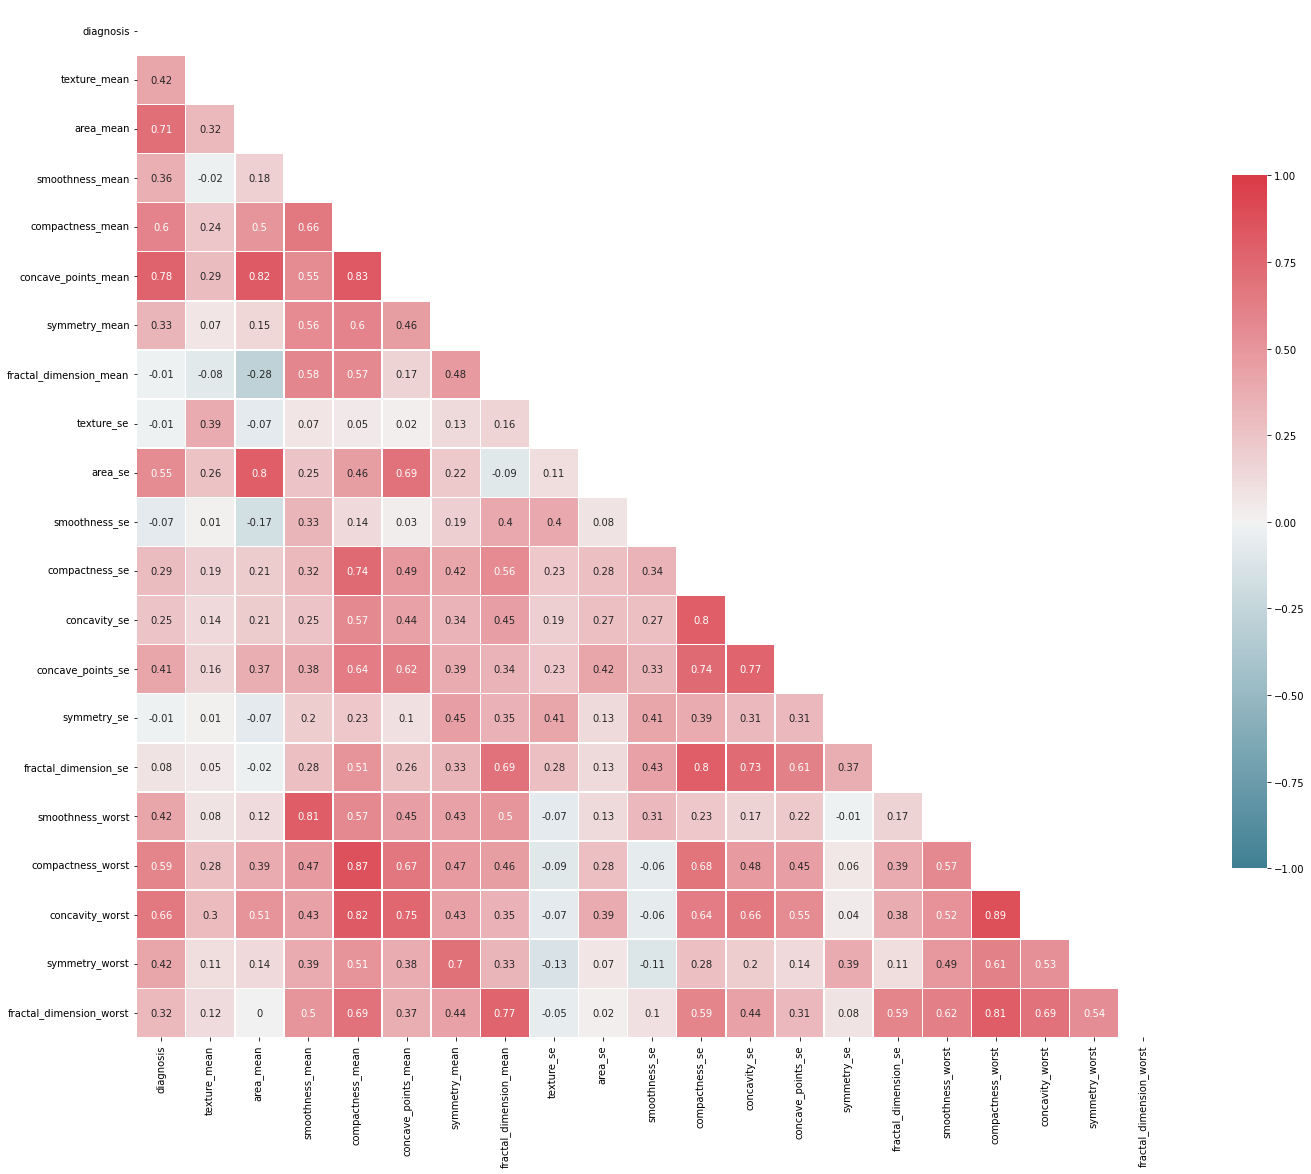

In [40]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

# Machine learning

### Splitting the data in train and test for ML algorithms

In [41]:
df.shape

(569, 21)

In [42]:
df.head(2)

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902


In [43]:
#Independent columns
Ind_cols = df.columns.difference(['diagnosis'])

In [44]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(df[Ind_cols],df.diagnosis, test_size=0.3, random_state=1234)

# 1:- Logistic regression using statsmodels(Traditional Approach)

**Splitting the data into train and test**

In [45]:
train, test = train_test_split(df, test_size=0.3, random_state=0)

**Initialising and fitting the model**

In [46]:
logreg = smf.logit(formula='diagnosis~area_se+concavity_worst +concave_points_mean+compactness_worst+concave_points_se+texture_mean+smoothness_worst+compactness_mean+area_mean+symmetry_worst+concavity_se', data=train)

In [47]:
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.058178
         Iterations 13


In [48]:
print(result.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.912     
Dependent Variable:    diagnosis          AIC:                70.3095   
Date:                  2022-06-02 07:31   BIC:                118.1469  
No. Observations:      398                Log-Likelihood:     -23.155   
Df Model:              11                 LL-Null:            -263.17   
Df Residuals:          386                LLR p-value:        5.7722e-96
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        13.0000                                          
------------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------------
Intercept            -31.9109   8.0240 -3.9770 0.0001  -47.6376 -16.1843
area_se                0.2044   0.0646  3.1641 0.0016    0.0778   0.3310
concavi

### Neglecting the variables with p > 00.5

In [49]:
logreg = smf.logit(formula='diagnosis~area_se+concavity_worst +concave_points_mean+texture_mean+compactness_mean+area_mean+symmetry_worst+concavity_se', data=train)

In [50]:
result = logreg.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.061273
         Iterations 12
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.907     
Dependent Variable:    diagnosis          AIC:                66.7736   
Date:                  2022-06-02 07:31   BIC:                102.6517  
No. Observations:      398                Log-Likelihood:     -24.387   
Df Model:              8                  LL-Null:            -263.17   
Df Residuals:          389                LLR p-value:        4.5429e-98
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        12.0000                                          
------------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------------
Intercept            -26.4028   6.2606 -4.2173 0.0

#### Accuracy Metrics

In [51]:
train_gini = 2*metrics.roc_auc_score(train['diagnosis'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['diagnosis'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['diagnosis'], result.predict(train))  #Reciever operating characteristics.
test_auc = metrics.roc_auc_score(test['diagnosis'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.9941780544998786
The Gini Index for the model built on the Test Data is :  0.980893592004703
The AUC for the model built on the Train Data is :  0.9970890272499393
The AUC for the model built on the Test Data is :  0.9904467960023515


In [52]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['diagnosis']  
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
478,0,4.908916e-05
303,0,3.561322e-06
155,0,4.527577e-03
186,1,9.993928e-01
101,0,1.550201e-07


In [53]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['diagnosis']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
512,1,0.999920
457,0,0.013806
439,0,0.000125
298,0,0.005484
37,0,0.000088


In [54]:
train## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [55]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.374372
0,0.020408,1.000000,0.819277,0.886935
0,0.040816,0.993289,0.883534,0.924623
0,0.061224,0.993289,0.899598,0.934673
0,0.081633,0.979866,0.919679,0.942211


In [56]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [57]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.374372,1.000000
0,0.020408,1.000000,0.819277,0.886935,1.819277
0,0.040816,0.993289,0.883534,0.924623,1.876823
0,0.061224,0.993289,0.899598,0.934673,1.892887
0,0.081633,0.979866,0.919679,0.942211,1.899544


In [58]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.387755,0.973154,0.983936,0.979899,1.95709
0,0.408163,0.973154,0.983936,0.979899,1.95709
0,0.428571,0.973154,0.983936,0.979899,1.95709
0,0.448980,0.973154,0.983936,0.979899,1.95709


In [59]:
#Choosen Best Cut-off is 0.44 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.44 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.44 else 0)

In [60]:
train_predict.head()

,actual,prob,predicted
478,0,4.908916e-05,0
303,0,3.561322e-06,0
155,0,4.527577e-03,0
186,1,9.993928e-01,1
101,0,1.550201e-07,0


In [61]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9798994974874372
The overall accuracy score for the Test Data  is :  0.9473684210526315


In [62]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       249
           1       0.97      0.97      0.97       149

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



### Performing logistic Regression using K-Fold validation manually

In [63]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(modelCV, train_x, train_y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.947


In [64]:
results

array([0.95      , 0.975     , 0.925     , 0.925     , 0.95      ,
       0.95      , 0.975     , 0.95      , 0.8974359 , 0.97435897])

# 2:- K-Nearest Neighbors

##### Important Tuning Parameters for KNN: 
- n_neighbors - The number of nearest neighbors K in the K-NN algorithm
- weights - weight function used in predictions.

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_x)

In [67]:
std_data_train = pd.DataFrame(std_data, columns=train_x.columns, index = train_x.index )

In [68]:
std_data_test = pd.DataFrame(sc.transform(test_x), columns=test_x.columns, index = test_x.index )

In [69]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
knn.fit(std_data_train, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [70]:
knn.best_score_

0.9568919523761797

In [71]:
train_pred = knn.predict(std_data_train)
test_pred = knn.predict(std_data_test)

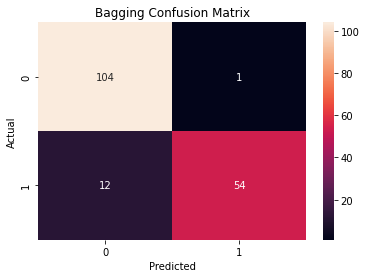

In [72]:
conf_matrix=confusion_matrix(test_y,test_pred)
sns.heatmap(conf_matrix,annot=True, fmt=".0f")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("Bagging Confusion Matrix")
plt.show()

In [73]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       252
           1       0.99      0.97      0.98       146

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [74]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       105
           1       0.98      0.82      0.89        66

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



In [75]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, train_pred))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, test_pred))

The overall accuracy score for the Train Data is :  0.9849246231155779
The overall accuracy score for the Test Data  is :  0.9239766081871345


# 3:- Decision Trees

##### Important Tuning Parameters for DT: 
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.

#### Fine Tuning the parameters

In [76]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [77]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_x, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [78]:
tree.best_score_

0.9296518987341773

In [79]:
tree.best_params_

{'max_depth': 4, 'max_features': 4}

In [80]:
train_pred = tree.predict(train_x)
test_pred = tree.predict(test_x)

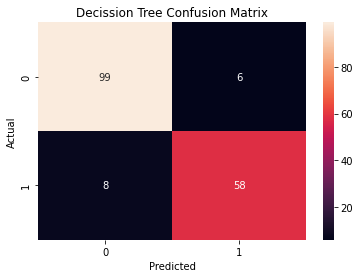

In [81]:
conf_matrix=confusion_matrix(test_y,test_pred)
sns.heatmap(conf_matrix,annot=True, fmt=".0f")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("Decission Tree Confusion Matrix")
plt.show()

In [82]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, train_pred))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, test_pred))

The overall accuracy score for the Train Data is :  0.9723618090452262
The overall accuracy score for the Test Data  is :  0.9181286549707602


In [83]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       252
           1       0.96      0.97      0.96       146

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [84]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.91      0.88      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



# 4:- Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier

**Tuning parameters**

In [86]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [87]:
gscv_results = gscv_bagging.fit(train_x, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [88]:
gscv_results.best_score_

0.9421518987341774

In [89]:
train_pred = gscv_results.predict(train_x)
test_pred = gscv_results.predict(test_x)

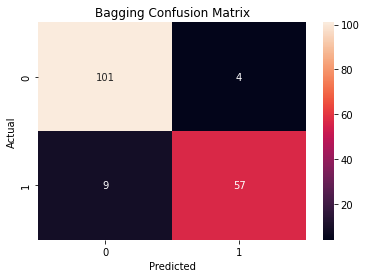

In [90]:
conf_matrix=confusion_matrix(test_y,test_pred)
sns.heatmap(conf_matrix,annot=True, fmt=".0f")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("Bagging Confusion Matrix")
plt.show()

In [91]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [92]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.93      0.86      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



# 5:- Random Forest

##### Important Tuning Parameters for Random Forest: 
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.
- n_estimators - The number of trees in the forest
- max_features - Number of features to consider when looking for the best split

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [95]:
gscv_results = gscv_Rf.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [96]:
gscv_results.best_score_

0.9572784810126581

In [97]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 100}

In [98]:
train_pred = gscv_results.predict(train_x)
test_pred = gscv_results.predict(test_x)

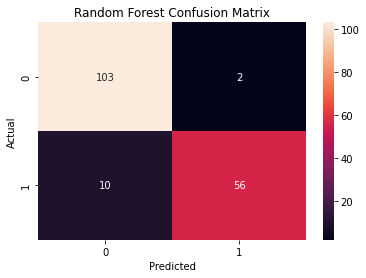

In [99]:
conf_matrix=confusion_matrix(test_y,test_pred)
sns.heatmap(conf_matrix,annot=True, fmt=".0f")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [100]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [101]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       105
           1       0.97      0.85      0.90        66

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



# Boosting

# 6:- Ada Boosting

In [102]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [103]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [104]:
gscv_ada.fit(train_x, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [105]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 600}

In [106]:
gscv_ada.best_score_

0.9798417721518987

In [107]:
ad=AdaBoostClassifier(learning_rate = 1, n_estimators=600)
ad.fit(train_x, train_y )

AdaBoostClassifier(learning_rate=1, n_estimators=600)

In [108]:
train_pred = ad.predict(train_x)
test_pred = ad.predict(test_x)

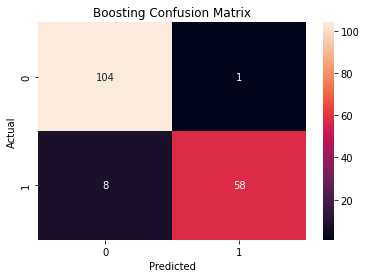

In [109]:
conf_matrix=confusion_matrix(test_y,test_pred)
sns.heatmap(conf_matrix,annot=True, fmt=".0f")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("Boosting Confusion Matrix")
plt.show()

In [110]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [111]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       105
           1       0.98      0.88      0.93        66

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



# 7:- Gradient Boost

##### Important Tuning Parameters for GBM: 
- learning_rate - the effect of each tree on the outcome is shrunk by this factor.
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.
- n_estimators - The number of trees in the forest
- max_features - Number of features to consider when looking for the best split

In [112]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_gbm.fit(train_x, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [113]:
gscv_gbm.best_params_

{'learning_rate': 1, 'n_estimators': 600}

In [114]:
gscv_gbm.best_score_

0.959746835443038

In [115]:
gbm=GradientBoostingClassifier(learning_rate = 1, n_estimators=800)
gbm.fit(train_x, train_y )

GradientBoostingClassifier(learning_rate=1, n_estimators=800)

In [116]:
train_pred = gbm.predict(train_x)
test_pred = gbm.predict(test_x)

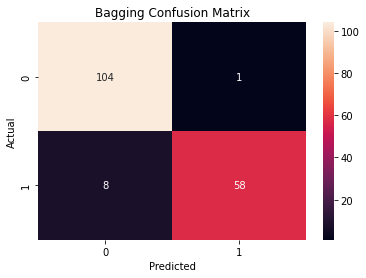

In [117]:
conf_matrix=confusion_matrix(test_y,test_pred)
sns.heatmap(conf_matrix,annot=True, fmt=".0f")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("Bagging Confusion Matrix")
plt.show()

In [118]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [119]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       105
           1       0.98      0.88      0.93        66

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



# 8:- Naive Bayes

In [120]:
nb_clf = GaussianNB()
nb_clf.fit(train_x, train_y)

GaussianNB()

In [121]:
metrics.confusion_matrix( test_y,nb_clf.predict( test_x) )

array([[100,   5],
       [ 15,  51]])

In [122]:
metrics.accuracy_score( test_y, nb_clf.predict( test_x ) )

0.8830409356725146

# 9:-Support Vector Machines (SVC)

##### Important Tuning Parameters for Support Vector Classifier: 
- C - C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly
- class_weight - Weights associated with classes in the form class_label : Weight. If not given, all classes are supposed to have weight one.
- degree - degree is a parameter used when kernel is set to poly. It’s basically the degree of the polynomial used to find the hyperplane to split the data.
- gamma - kernel coefficient for rbf, ploy and sigmoid to handle non-linear classification
- kernel - This selects the type of hyperplane used to separate the data.
- tol - tolerance for stopping criterion.

In [123]:
model = SVC(kernel='rbf', class_weight='balanced')

In [124]:
model.fit(train_x, train_y)

SVC(class_weight='balanced')

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_x, train_y)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [126]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.0001}


In [127]:
model = grid.best_estimator_
yfit = model.predict(test_x)

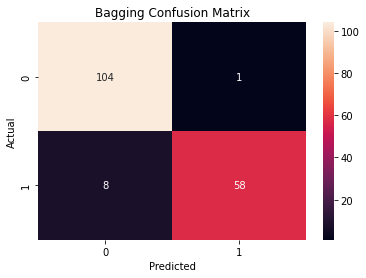

In [128]:
conf_matrix=confusion_matrix(test_y,test_pred)
sns.heatmap(conf_matrix,annot=True, fmt=".0f")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("Bagging Confusion Matrix")
plt.show()

In [129]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       105
           1       0.88      0.85      0.86        66

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.89      0.89      0.89       171



# **Visualizing the Accuracy of different Algorithms**

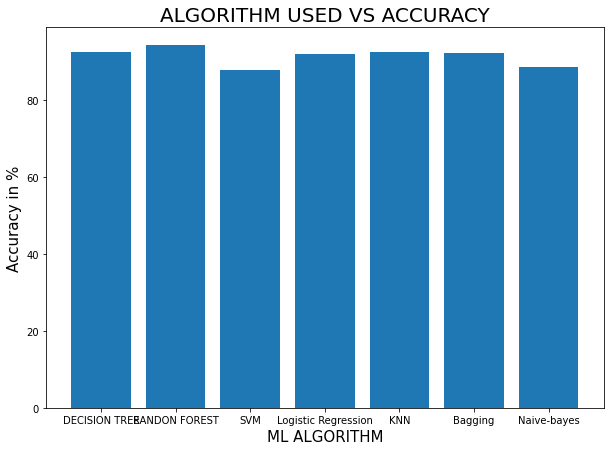

In [131]:
plt.figure(figsize=(10,7))


a= ['DECISION TREE', 'RANDON FOREST', 'SVM', 'Logistic Regression','KNN','Bagging','Naive-bayes']

b=[92.39,94.15,87.71,91.81,92.39,92.10,88.65]
plt.bar(a,b)
plt.title('ALGORITHM USED VS ACCURACY', fontsize=20)

plt.xlabel('ML ALGORITHM', fontsize=15) 
plt.ylabel('Accuracy in %', fontsize=15)
plt.show()